<a href="https://www.kaggle.com/code/kaichixie/eda-happy-whale-and-dolphin?scriptVersionId=92582407" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**The objective of this competition is to identify individual dolphins and whales with a dataset of their images.
Therefore, in this EDA, I am going through the photos and individual information provided to try to get the whole picture of our data.**

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
from PIL import Image
from tqdm import tqdm
import random 
import cv2

In [2]:
train = pd.read_csv("../input/happy-whale-and-dolphin/train.csv")
test = pd.read_csv("../input/happy-whale-and-dolphin/sample_submission.csv")
train.describe()

,image,species,individual_id
count,51033,51033,51033
unique,51033,30,15587
top,00021adfb725ed.jpg,bottlenose_dolphin,37c7aba965a5
freq,1,9664,400


In [3]:
train.head()

,image,species,individual_id
0,00021adfb725ed.jpg,melon_headed_whale,cadddb1636b9
1,000562241d384d.jpg,humpback_whale,1a71fbb72250
2,0007c33415ce37.jpg,false_killer_whale,60008f293a2b
3,0007d9bca26a99.jpg,bottlenose_dolphin,4b00fe572063
4,00087baf5cef7a.jpg,humpback_whale,8e5253662392


**First, check if there is any missing values**

In [4]:
#check for missing values
train.isnull().sum()

image            0
species          0
individual_id    0
dtype: int64

In [5]:
test.isnull().sum()

image          0
predictions    0
dtype: int64

**Adding the file path to our image dataframe below.**

In [6]:
train_img_dir = "../input/happy-whale-and-dolphin/train_images/"
test_img_dir = "../input/happy-whale-and-dolphin/test_images/"
train["path"] =  train_img_dir + train["image"]
test["path"] = test_img_dir + test["image"]
train.head()

,image,species,individual_id,path
0,00021adfb725ed.jpg,melon_headed_whale,cadddb1636b9,../input/happy-whale-and-dolphin/train_images/...
1,000562241d384d.jpg,humpback_whale,1a71fbb72250,../input/happy-whale-and-dolphin/train_images/...
2,0007c33415ce37.jpg,false_killer_whale,60008f293a2b,../input/happy-whale-and-dolphin/train_images/...
3,0007d9bca26a99.jpg,bottlenose_dolphin,4b00fe572063,../input/happy-whale-and-dolphin/train_images/...
4,00087baf5cef7a.jpg,humpback_whale,8e5253662392,../input/happy-whale-and-dolphin/train_images/...


**Check the species name**

In [7]:
species = train["species"].unique()
print("number of unique species: ", train["species"].nunique())
print("names of species: ", train["species"].unique())
species.sort()
print("------------------------------------------")
print(train["species"].value_counts())

number of unique species:  30
names of species:  ['melon_headed_whale' 'humpback_whale' 'false_killer_whale'
 'bottlenose_dolphin' 'beluga' 'minke_whale' 'fin_whale' 'blue_whale'
 'gray_whale' 'southern_right_whale' 'common_dolphin' 'kiler_whale'
 'pilot_whale' 'dusky_dolphin' 'killer_whale' 'long_finned_pilot_whale'
 'sei_whale' 'spinner_dolphin' 'bottlenose_dolpin' 'cuviers_beaked_whale'
 'spotted_dolphin' 'globis' 'brydes_whale' 'commersons_dolphin'
 'white_sided_dolphin' 'short_finned_pilot_whale' 'rough_toothed_dolphin'
 'pantropic_spotted_dolphin' 'pygmy_killer_whale' 'frasiers_dolphin']
------------------------------------------
bottlenose_dolphin           9664
beluga                       7443
humpback_whale               7392
blue_whale                   4830
false_killer_whale           3326
dusky_dolphin                3139
spinner_dolphin              1700
melon_headed_whale           1689
minke_whale                  1608
killer_whale                 1493
fin_whale       

In [8]:
### Cleaning miss-spelling species name
### Rename with the major species name so each one has a "dolphin/whale" at the end
train["species"].replace(
    {
        "bottlenose_dolpin" : "bottlenose_dolphin",
        "kiler_whale" : "killer_whale",
        "beluga" : "beluga_whale",
        "globis" : "globis_whale"
    },
    inplace = True
)
species = train["species"].unique()
print("number of unique species: ", train["species"].nunique())
print("names of species: ", train["species"].unique())

number of unique species:  28
names of species:  ['melon_headed_whale' 'humpback_whale' 'false_killer_whale'
 'bottlenose_dolphin' 'beluga_whale' 'minke_whale' 'fin_whale'
 'blue_whale' 'gray_whale' 'southern_right_whale' 'common_dolphin'
 'killer_whale' 'pilot_whale' 'dusky_dolphin' 'long_finned_pilot_whale'
 'sei_whale' 'spinner_dolphin' 'cuviers_beaked_whale' 'spotted_dolphin'
 'globis_whale' 'brydes_whale' 'commersons_dolphin' 'white_sided_dolphin'
 'short_finned_pilot_whale' 'rough_toothed_dolphin'
 'pantropic_spotted_dolphin' 'pygmy_killer_whale' 'frasiers_dolphin']


In [9]:
#Create label for class as dolphin/whale
train['labels'] = train["species"].map(lambda x : "dolphin" if "dolphin" in x else "whale")
train.head()

,image,species,individual_id,path,labels
0,00021adfb725ed.jpg,melon_headed_whale,cadddb1636b9,../input/happy-whale-and-dolphin/train_images/...,whale
1,000562241d384d.jpg,humpback_whale,1a71fbb72250,../input/happy-whale-and-dolphin/train_images/...,whale
2,0007c33415ce37.jpg,false_killer_whale,60008f293a2b,../input/happy-whale-and-dolphin/train_images/...,whale
3,0007d9bca26a99.jpg,bottlenose_dolphin,4b00fe572063,../input/happy-whale-and-dolphin/train_images/...,dolphin
4,00087baf5cef7a.jpg,humpback_whale,8e5253662392,../input/happy-whale-and-dolphin/train_images/...,whale


In [10]:
def plot_train_image(dataset,title):
    plt.figure(figsize = (15,10))
    plt.suptitle(title, fontsize=30)
    for i, sp in enumerate(dataset.species.unique()):
        plt.subplot(4,7,i+1)
        imgs = dataset[dataset["species"] == sp].reset_index(drop = True)
        random_pick_img_path = imgs.loc[random.randint(0, len(imgs)-1),'path']
        img = Image.open(random_pick_img_path)
        plt.imshow(img)
        plt.axis("off")
        plt.title(sp)
    plt.tight_layout()
    plt.show()

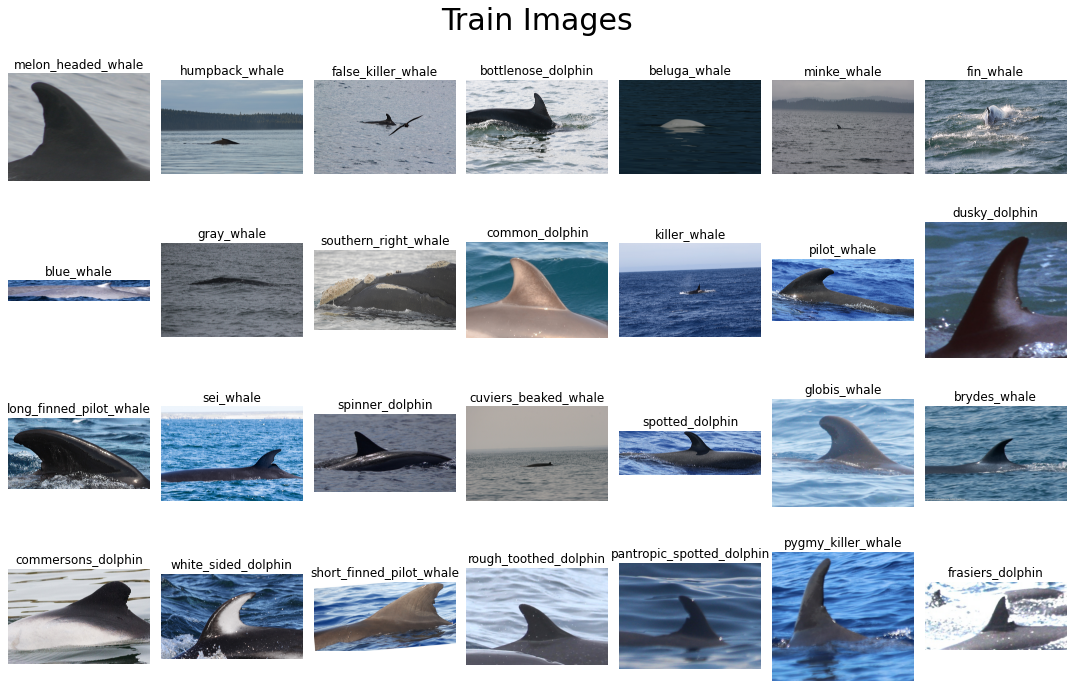

In [11]:
### Looking through photos randomly for every species in our dataset
plot_train_image(train,"Train Images")

In [12]:
# Function for retreving the width and height for every photo.
def get_image_size(train):
    widths, heights = [], []
    for path in tqdm(train["path"]):
        width, height = Image.open(path).size
        widths.append(width)
        heights.append(height)

    train["widths"] = widths
    train["heights"] = heights
    train["dimensions"] = train['widths'] * train['heights']


In [13]:
# train.to_csv("train_df_with_imgs.csv", index=False)

In [14]:
# The above data processing takes around ten minutes so I have saved the result for later use.
train = pd.read_csv("../input/happy-whale-and-dolphin-eda/train_df_with_imgs.csv")
train.head()

,image,species,individual_id,path,labels,widths,heights,dimensions
0,00021adfb725ed.jpg,melon_headed_whale,cadddb1636b9,../input/happy-whale-and-dolphin/train_images/...,whale,804,671,539484
1,000562241d384d.jpg,humpback_whale,1a71fbb72250,../input/happy-whale-and-dolphin/train_images/...,whale,3504,2336,8185344
2,0007c33415ce37.jpg,false_killer_whale,60008f293a2b,../input/happy-whale-and-dolphin/train_images/...,whale,3599,2399,8634001
3,0007d9bca26a99.jpg,bottlenose_dolphin,4b00fe572063,../input/happy-whale-and-dolphin/train_images/...,dolphin,3504,2336,8185344
4,00087baf5cef7a.jpg,humpback_whale,8e5253662392,../input/happy-whale-and-dolphin/train_images/...,whale,3599,2699,9713701


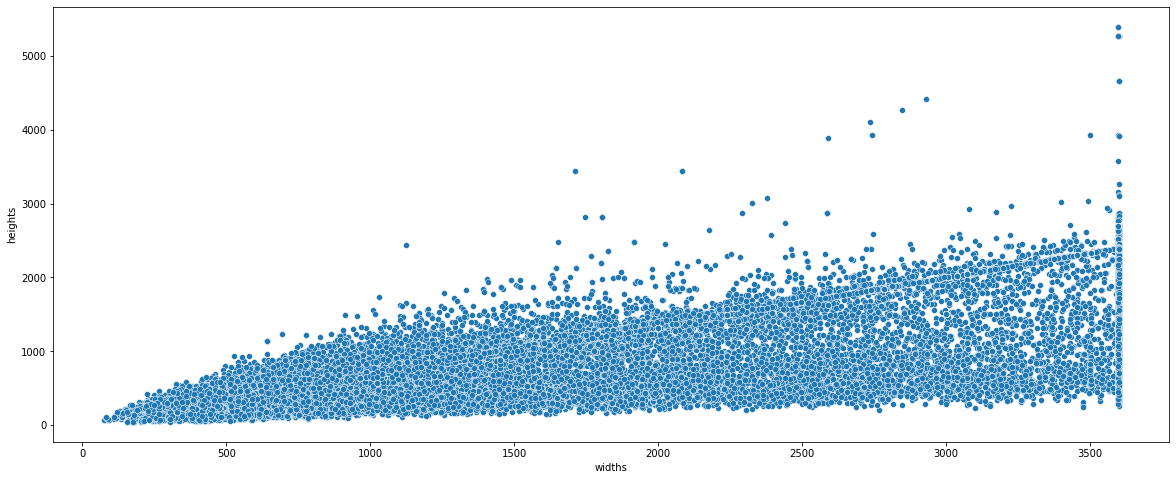

In [15]:
plt.figure(figsize = (20,8))
sns.scatterplot(x = "widths", y = "heights", data =train)
plt.show()

As we can see, we actually have multiple sizes of photos in our dataset.

In [16]:
print("Imgae Max Height: ", train["heights"].max())
print("Image Min Height: ", train["heights"].min())
print("Image Max Width: ", train["widths"].max())
print("Image Min Width: ", train["widths"].min())

Imgae Max Height:  5399
Image Min Height:  41
Image Max Width:  3600
Image Min Width:  75


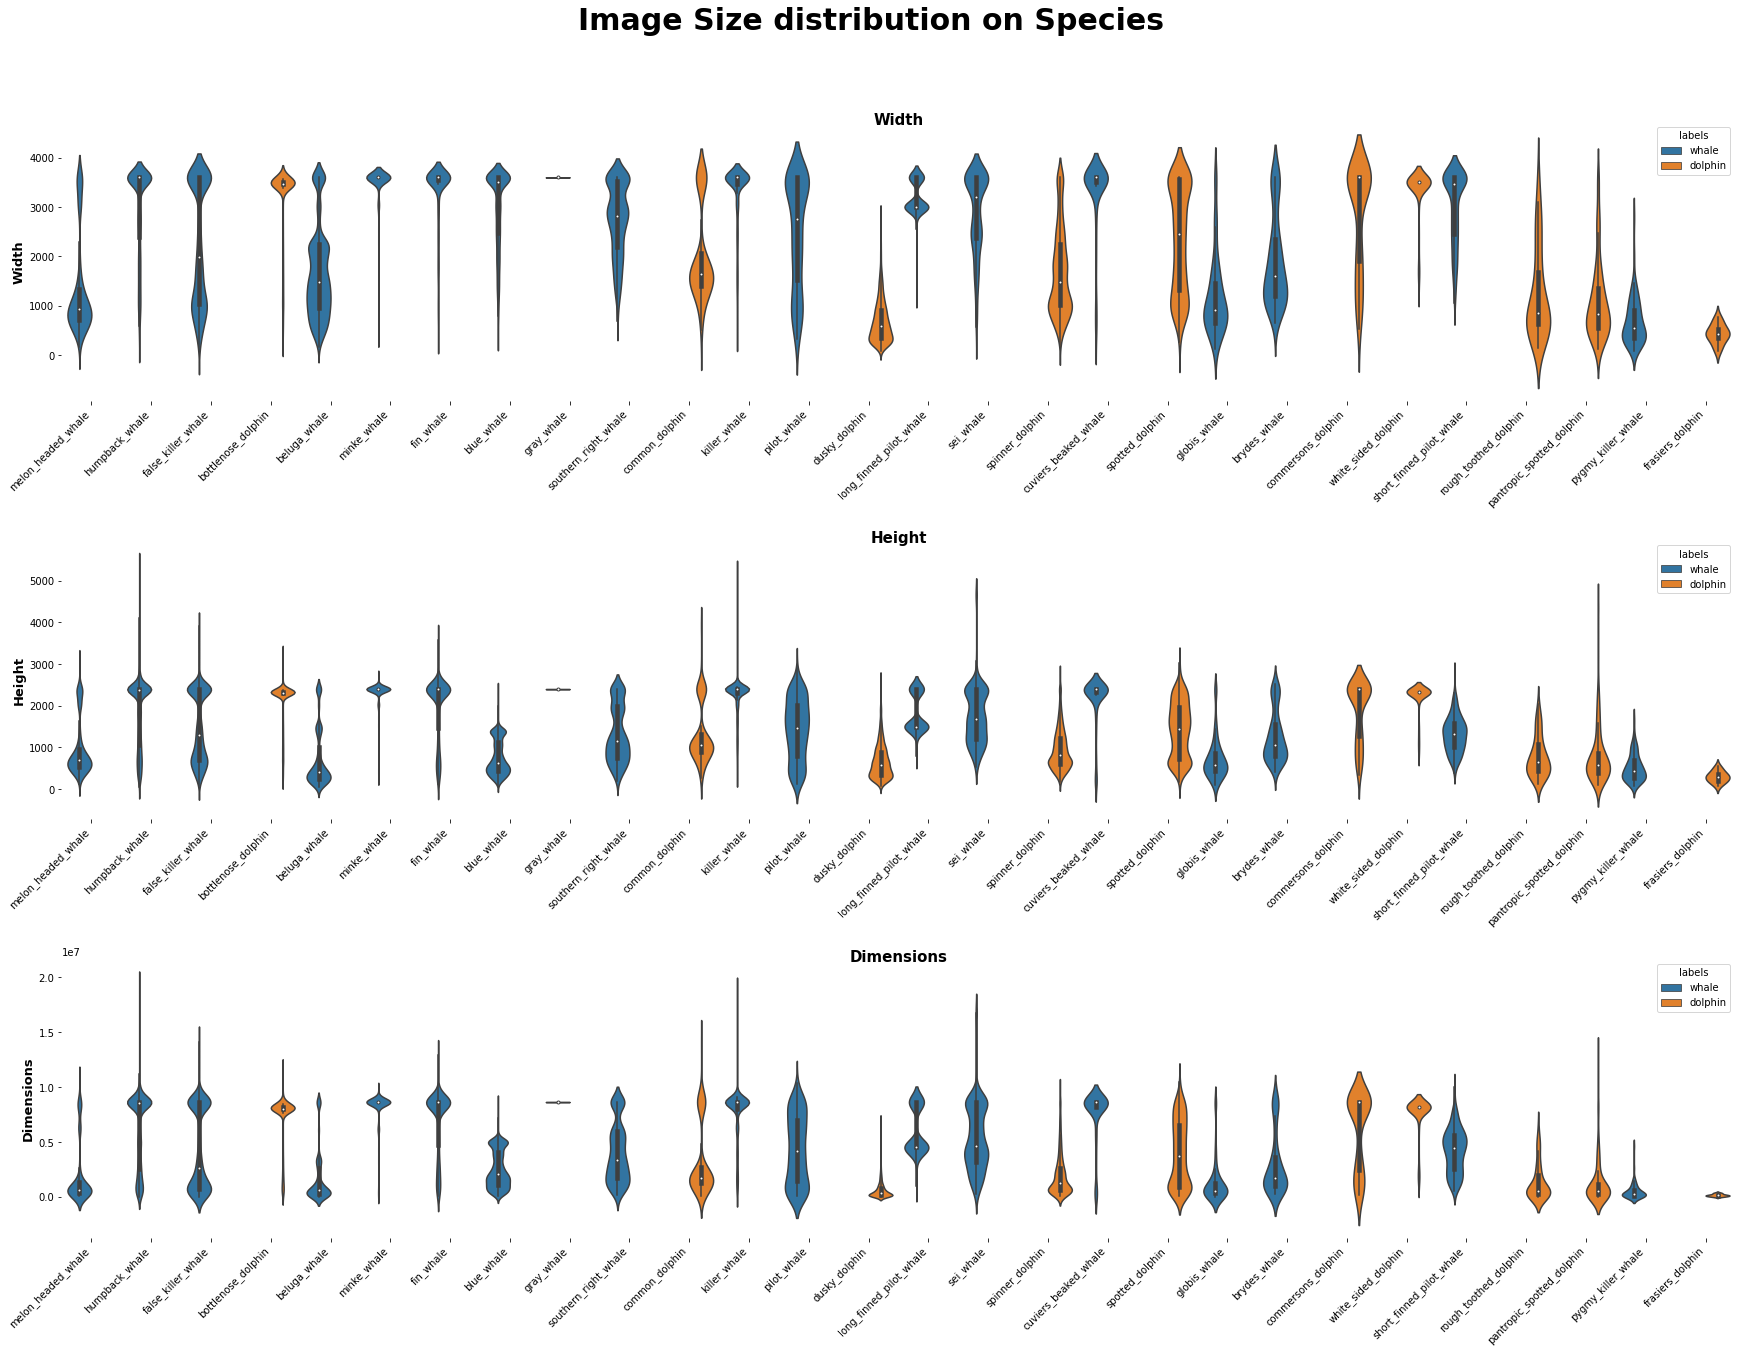

In [17]:
#Image size distribution
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize= (30,20))

fig.suptitle("Image Size distribution on Species", size = 30, weight = "bold")

v1 = sns.violinplot(data = train, x = "species", y = "widths", ax=ax1, hue="labels")

ax1.set_title("Width", y = 0.97, size = 15, weight = "bold")
ax1.set_xlabel("")
ax1.set_ylabel("Width",size=13, weight = "bold")
ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 45, ha = 'right')

v2 = sns.violinplot(data = train, x = "species", y = "heights", ax = ax2, hue = "labels")
ax2.set_title("Height", y = 0.97, size = 15, weight = "bold")
ax2.set_xlabel("")
ax2.set_ylabel("Height",size=13, weight = "bold")
ax2.set_xticklabels(ax2.get_xticklabels(),rotation = 45, ha = 'right')

v3 = sns.violinplot(data = train, x = "species", y = "dimensions", ax = ax3, hue = "labels")
ax3.set_title("Dimensions", y = 0.97, size = 15, weight = "bold")
ax3.set_xlabel("")
ax3.set_ylabel("Dimensions",size=13, weight = "bold")
ax3.set_xticklabels(ax3.get_xticklabels(),rotation = 45, ha = 'right')

sns.despine(left=True, bottom=True)
plt.subplots_adjust(
    left=None, 
    bottom=None, 
    right=None, 
    top=0.90, 
    wspace=None, 
    hspace=0.5
);

I was a bit curious after seeing that the photos of gray whales all have the same size. So I print out some random pictures of this species below to take a look.

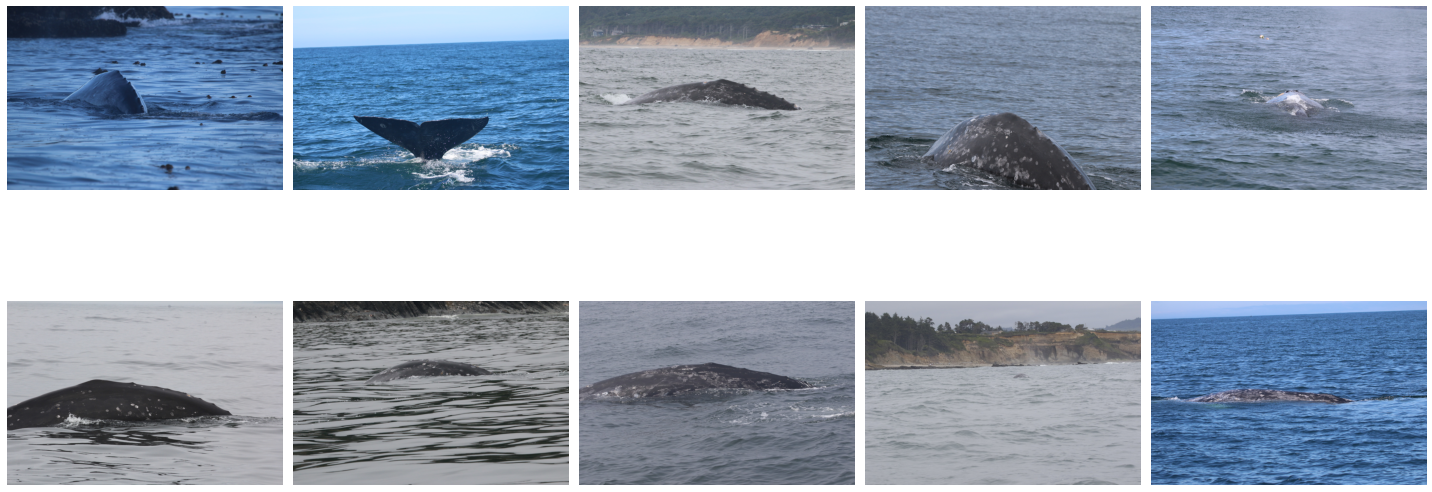

In [18]:
tmp = train[train["species"] == "gray_whale"].reset_index(drop=True)
plt.figure(figsize=(20,10))
for i, n in enumerate(random.sample(range(0,len(tmp)-1), 10)):
    im = Image.open(tmp.loc[n,"path"])
    plt.subplot(2,5,i+1)
    plt.axis("off")
    plt.imshow(im)
plt.tight_layout()
plt.show()

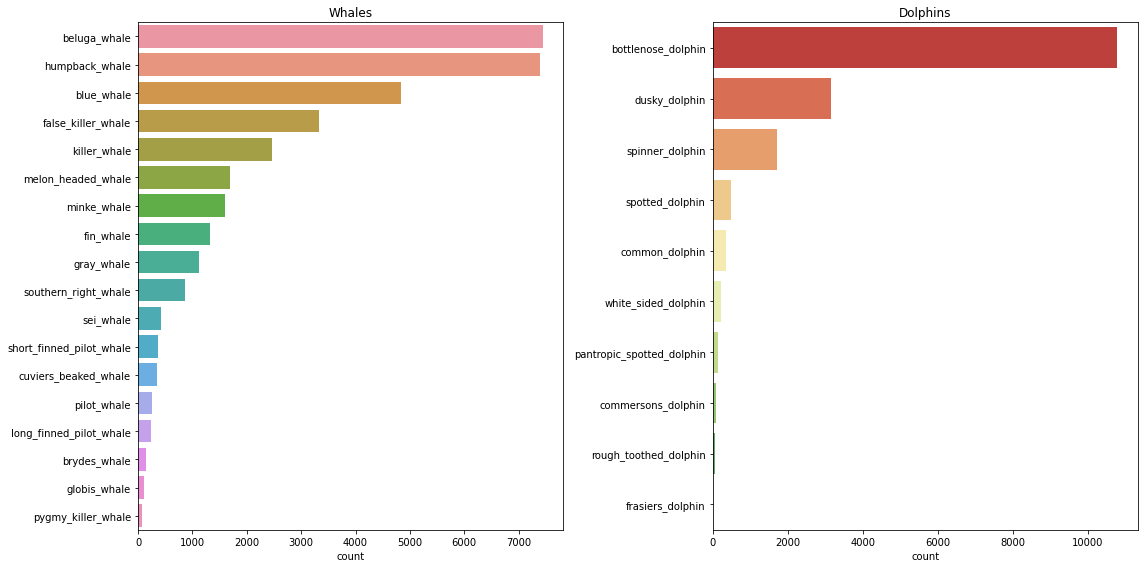

In [19]:
fig, ax = plt.subplots(1,2, figsize=(16,8))
whales = train[train["labels"] == "whale"]
dolphins = train[train["labels"] == "dolphin"]
assert (len(whales)+len(dolphins))==len(train)

sns.countplot(
    y = "species",
    data = whales,
    order = whales["species"].value_counts().index,
    ax = ax[0]
)

ax[0].set_title('Whales')
ax[0].set_ylabel(None)

sns.countplot(
    y="species", 
    data=dolphins, 
    ax=ax[1], 
    order = dolphins["species"].value_counts().index,
    palette="RdYlGn"
)
ax[1].set_title('Dolphins')
ax[1].set_ylabel(None)

plt.tight_layout()
plt.show()


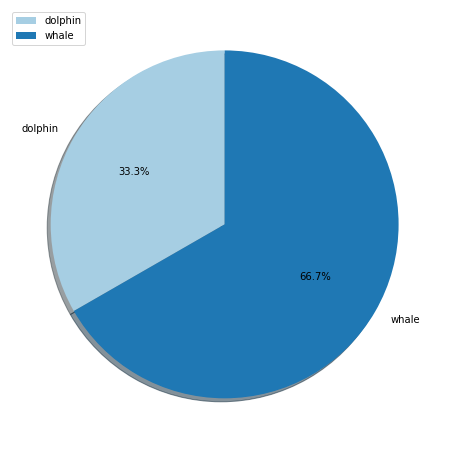

In [20]:
#pie chart
plt.figure(figsize=(8,8))
label_cnt = train.groupby(["labels"]).size().reset_index(name ="counts")
plt.pie(label_cnt["counts"], labels= label_cnt["labels"],autopct='%1.1f%%',colors = sns.color_palette('Paired')[0:9],
        shadow=True, startangle=90)
plt.legend(loc = "upper left")
plt.show()

In our dataset, the amount of photos varies by individials and by classes(whale/dolphin)

let's take a look at individuals now.


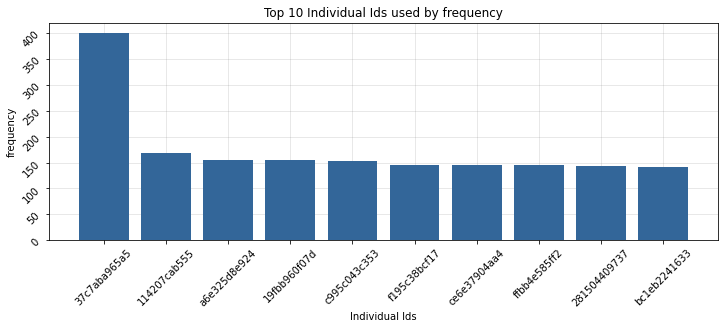

In [21]:
individuals = train["individual_id"].value_counts().head(10)
top_ten = pd.DataFrame({'individual_id':individuals.index, 'frequency' : individuals.values})
plt.figure(figsize = (12,4))
plt.bar(top_ten["individual_id"], top_ten["frequency"], width = 0.8, color=(0.2, 0.4, 0.6), zorder =4)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.ylabel("frequency")
plt.xlabel("Individual Ids")
plt.title("Top 10 Individual Ids used by frequency")
plt.grid(visible = True, color ='grey',linestyle ='-', linewidth = 0.9,alpha = 0.2, zorder=0)
plt.show()

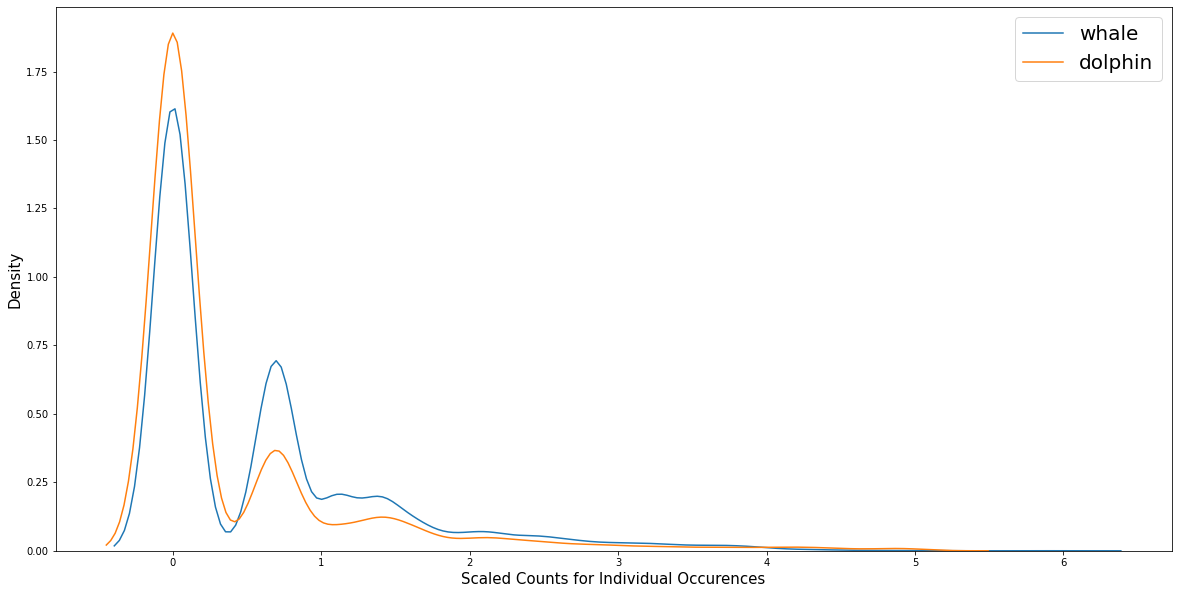

In [22]:
plt.figure(figsize = (20, 10))
sns.kdeplot(np.log(train.loc[train['labels'] == 'whale']['individual_id'].value_counts()))
sns.kdeplot(np.log(train.loc[train['labels'] == 'dolphin']['individual_id'].value_counts()))
plt.xlabel("Scaled Counts for Individual Occurences", fontsize=15)
plt.ylabel("Density", fontsize=15)
plt.legend(labels = ['whale', 'dolphin'], prop= {'size': 20})
plt.show()

In [23]:
train.head()

,image,species,individual_id,path,labels,widths,heights,dimensions
0,00021adfb725ed.jpg,melon_headed_whale,cadddb1636b9,../input/happy-whale-and-dolphin/train_images/...,whale,804,671,539484
1,000562241d384d.jpg,humpback_whale,1a71fbb72250,../input/happy-whale-and-dolphin/train_images/...,whale,3504,2336,8185344
2,0007c33415ce37.jpg,false_killer_whale,60008f293a2b,../input/happy-whale-and-dolphin/train_images/...,whale,3599,2399,8634001
3,0007d9bca26a99.jpg,bottlenose_dolphin,4b00fe572063,../input/happy-whale-and-dolphin/train_images/...,dolphin,3504,2336,8185344
4,00087baf5cef7a.jpg,humpback_whale,8e5253662392,../input/happy-whale-and-dolphin/train_images/...,whale,3599,2699,9713701


References:

https://www.kaggle.com/code/sahamed/eda-visualization-augmentation

https://www.kaggle.com/code/kayvanshah/eda-whale-dolphin-identification

Really grateful for these shared notebooks. I have learnt a lot and hope my version can be helpful to others as well.